# REGULARISATION ~ LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output


In [13]:
df=pd.read_csv('housing.csv')

In [15]:
#Checking For Null values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [16]:
#Dropping all columns consisiting of the Null values 
df=df.dropna(axis=1)

In [17]:
#Checking whether Columns consisting of Null values are dropped or not
train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [19]:
df.shape

(20640, 9)

# First 10,320 values are taken for Training Set 

In [33]:
target_train=df['median_house_value'].copy()
target_train=target_train[:10320]

In [39]:
target_train=np.array(target_train)
target_train=target_train.reshape(1,len(target_train))


In [34]:
features_train=df.drop('median_house_value',axis=1)
features_train=features_train.select_dtypes(include=['int32','int64','float32','float64'])
features_train=features_train[:10320]

In [38]:
print('shape of target in training :',target_train.shape)
print('shape of training features :',features_train.shape)

shape of target in training : (1, 10320)
shape of training features : (10320, 7)


In [45]:
target_train=target_train/target_train.max()
features_train=features_train/features_train.max()

In [191]:

#Defining Functions
def line(m,x,c):
    return np.dot(m,x.T)+c
def error(m,x,c,y,reg_param):
    return np.mean((line(m,x,c)-y)**2)+reg_param*(np.sum(m)**2)
def der_slope(m,x,c,y,reg_param):
    slope= 2*np.mean(np.multiply((line(m,x,c)-y),x.T),axis=1)
    slope=np.array(slope)
    slope=slope.reshape(1,7)
    return slope+2*reg_param*(np.sum(m))
def der_int(m,x,c,y):
    return 2*np.mean(line(m,x,c)-y)
def acc(m,x,c,y):
    return 100-((error(m,x,c,y,reg_param)**2)*100)


# Error and Accuracy of Training Set

error: 0.04137006593005069
accuracy: 99.82885176449433
iteration: 999
m= [[-0.12204016  0.05679308 -0.22574383 -0.5540457  -0.23105727  0.51709558
   0.55996762]] c= 0.4887395158571063


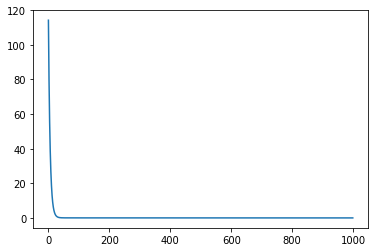

In [192]:
m=abs((np.random.randn(1,len(features_train.T))))
c=abs(random.random())
it=1000
lr=0.001
reg_param=6
cost=[]
for i in range(it):
    m=m-lr*der_slope(m,features_train,c,target_train,reg_param)
    c=c-lr*der_int(m,features_train,c,target_train)
    clear_output(True)
    cost.append(error(m,features_train,c,target_train,reg_param))
    print('error:',error(m,features_train,c,target_train,reg_param))
    print('accuracy:',acc(m,features_train,c,target_train))
    print('iteration:',i)
    print('m=',m,'c=',c)
plt.plot(cost)
plt.show()

# Predicted and Actual values of Training set

In [101]:
line(m,features_train,c)

array([[0.72822949, 0.72141698, 0.66729439, ..., 0.94831444, 0.97267769,
        0.80693929]])

In [102]:
target_train

array([[0.90519819, 0.71699857, 0.70419859, ..., 0.90859818, 0.92019816,
        0.73059854]])

# Remaining 10,320 values are taken for Testing Set

In [59]:
target_test=df['median_house_value'].copy()
target_test=target_test[10320:]

In [62]:
features_test=df.drop('median_house_value',axis=1).copy()
features_test=features_test.select_dtypes(include=['int32','int64','float32','float64'])
features_test=features_test[10320:]

In [65]:
target_test=np.array(target_test)
target_test=target_test.reshape(1,len(target_test))

In [66]:
print('shape of target in testing :',target_test.shape)
print('shape of testing features :',features_test.shape)

shape of target in testing : (1, 10320)
shape of testing features : (10320, 7)


In [193]:
m_train= np.mat([[-0.12204016  ,0.05679308, -0.22574383, -0.5540457 , -0.23105727  ,0.51709558,0.55996762]])
c_train= 0.4887395158571063
m_train=np.array(m_train)
features_test.shape

(10320, 7)

In [194]:
target_test=target_test/target_test.max()
features_test=features_test/features_test.max()


# Error and Accuracy of Testing set

In [195]:

def line(m,x,c):
    return np.dot(m,x.T)+c
def error(m,x,c,y):
    return np.mean((line(m,x,c)-y)**2)
def acc(m,x,c,y):
    return 100-((error(m,x,c,y)/np.mean(y**2))*100)
print('accuracy:',acc(m_train,features_test,c_train,target_test))
print('error :',error(m_train,features_test,c_train,target_test))

accuracy: 80.23712762598154
error : 0.044817900980306476


# Predicted and Actual Values of Testing set

In [158]:
print('predicted values of testing data :',line(m_train,features_test,c_train))
print('Actual values of training data :',target_test)


predicted values of testing data : [[0.23524913 0.25897586 0.24581311 ... 0.27219794 0.27093546 0.26026984]]
Actual values of training data : [[0.67119866 0.53199894 0.57639885 ... 0.18459963 0.16939966 0.17879964]]
